<a href="https://colab.research.google.com/github/SevilAnna/UniversityClasses/blob/master/EM%C3%9C334%20-%20Regression%20Analysis/Homework1/code_of_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purity of oxygen produced by a fractional distillation process is thought to be related to the percentage of hydrocarbons in the main condensor of the processing unit. Twenty samples are shown below.
<br />a. Fit a simple linear regression model to the data.
<br />b. Test the hypothesis H0: β1 = 0.
<br />c. Calculate R2.
<br />d. Find a 95% CI on the slope.
<br />e. Find a 95% CI on the mean purity when the hydrocarbon percentage is 1.00.

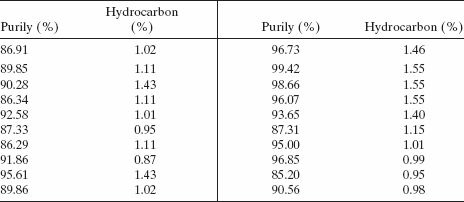

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math
import scipy
from scipy.stats import t
import copy

# Creating the dataframe

In [ ]:
data = {"Purity":
        [86.91, 89.85, 90.28, 86.34, 92.58, 87.33, 86.29, 91.86, 95.61, 89.86, 
         96.73, 99.42, 98.66, 96.07, 93.65, 87.31, 95.00, 96.85, 85.20, 90.56], 
        "Hydrocarbon":
        [1.02 , 1.11 , 1.43 , 1.11 , 1.01 , 0.95 , 1.11 , 0.87 , 1.43 , 1.02 ,
         1.46 , 1.55 , 1.55 , 1.55 , 1.40 , 1.15 , 1.01 , 0.99 , 0.95 , 0.98 ] }
df = pd.DataFrame(data)

df.describe()

,Purity,Hydrocarbon
count,20.000000,20.000000
mean,91.818000,1.182500
std,4.478882,0.236752
min,85.200000,0.870000
25%,87.325000,1.005000
50%,91.210000,1.110000
75%,95.725000,1.430000
max,99.420000,1.550000


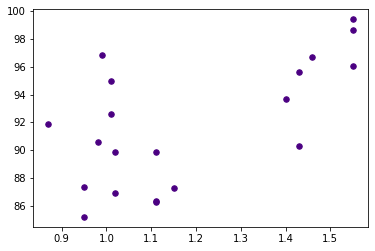

In [ ]:
plt.scatter(df["Hydrocarbon"], df["Purity"],
            color = "indigo", marker = "o", s = 30) 

# Regression

https://realpython.com/linear-regression-in-python/

### a. Simple Linear Regression

In [ ]:
H_mean = df["Hydrocarbon"].mean()
H_var = ( df["Hydrocarbon"].std() )**2
print("Hydrocarbon\nmean =",H_mean,"\nvar  =",H_var)

P_mean = df["Purity"].mean()
P_var = ( df["Purity"].std() )**2
print("\nPurity\nmean =",P_mean,"\nvar  =",P_var)

Hydrocarbon
mean = 1.1824999999999999 
var  = 0.05605131578947368

Purity
mean = 91.818 
var  = 20.06038526315788


In [ ]:
n = len(df["Hydrocarbon"])  # n=20
x = df["Hydrocarbon"]
y = df["Purity"]

# Calculating Sxx and Sxy
Sxx = np.sum(x*x) - np.sum(x)**2 / n 
Sxy = np.sum(x*y) - np.sum(x) * np.sum(y) / n

# Calculating B1 and B0 estimators
B1 = Sxy / Sxx            # slope
B0 = P_mean - B1*H_mean   # intercept

# Regression Line & Residual e
y_hat = B0 + B1*x
e = y - y_hat     # sum is equal to 0

df2 = df
df2["y_hat"], df2["Residual e"] = y_hat, e

print("Sxx =",Sxx,"\nSxy =",Sxy)
print("B\u2080 =", B0,"\nB\u2081 =", B1)   
print("\u0177  =", round(B0,2), "\u2212", round(B1,2), "x")
df2.head()

Sxx = 1.064975000000004 
Sxy = 12.567799999999806
B₀ = 77.8632841616003 
B₁ = 11.801028193149849
ŷ  = 77.86 − 11.8 x


,Purity,Hydrocarbon,y_hat,Residual e
0,86.91,1.02,89.900333,-2.990333
1,89.85,1.11,90.962425,-1.112425
2,90.28,1.43,94.738754,-4.458754
3,86.34,1.11,90.962425,-4.622425
4,92.58,1.01,89.782323,2.797677


In [ ]:
xx = np.array(x).reshape((-1, 1))      # two-dimentional
yy = np.array(y)                       # one-dimentional

model = LinearRegression().fit(xx, yy)

print("B\u2080 =", round(model.intercept_,2))     # B0
print("B\u2081 =", round(float(model.coef_),2))   # B1
y_hat = model.intercept_ + int(model.coef_)*xx     # y_hat
print("\u0177  =",
      round(model.intercept_,2), "\u2212", round(float(model.coef_),2), "x")
print("R\u00b2 =", round(model.score(xx, yy),3))    # coeff. of determination

B₀ = 77.86
B₁ = 11.8
ŷ  = 77.86 − 11.8 x
R² = 0.389


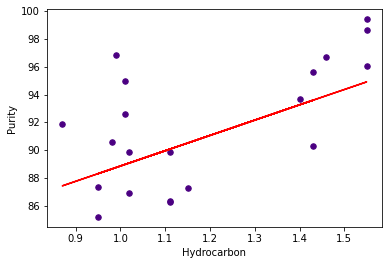

In [ ]:
# plotting the regression graph
plt.scatter(x, y,
            color = "indigo", marker = "o", s = 30) 
plt.plot(x, y_hat, color = "r")
plt.xlabel("Hydrocarbon"), plt.ylabel("Purity")
plt.show()

### b. Testing hypothesis H<sub>0</sub> : β<sub>1</sub> = 0

In [ ]:
alpha = 0.05
tt = (t.ppf(1 - (alpha/2), df=n-2))

####For Slope

H<sub>0</sub> : β<sub>1</sub> = β<sub>10</sub> <br />
H<sub>1</sub> : β<sub>1</sub> $\neq$ β<sub>10</sub> <br />
se(β<sub>1</sub>) = √(MS<sub>Res</sub> / S<sub>xx</sub>) <br />
t<sub>0</sub> = (β<sub>1</sub> - β<sub>10</sub>) / se(β<sub>1</sub>)<br />
--> reject H<sub>0</sub> if t<sub>0</sub> > t<sub>α/2,n-2</sub>

In [ ]:
MSres = sum(e**2)/(n-2)
se_B1 = math.sqrt(MSres / Sxx)
t0 = (B1-0)/se_B1
print("t\u2080 =",round(t0,3),"and t =",round(tt,3),"\n")
print("t\u2080 > t\nReject H\u2080") if t0 > tt else print(("t\u2080 < t\nFail to reject H\u2080"))

t₀ = 3.386 and t = 2.101 

t₀ > t
Reject H₀


In [ ]:
p_value = scipy.stats.t.sf(abs(t0), n-2)
print("p-value =",round(p_value,3),"and α =",round(alpha,3),"\n")
print("p-value > α\nFail to reject H\u2080") if p_value > alpha else print(("p-value < α\nReject H\u2080"))

p-value = 0.002 and α = 0.05 

p-value < α
Reject H₀


####For Intercept

H<sub>0</sub> : β<sub>0</sub> = β<sub>00</sub> <br />
H<sub>1</sub> : β<sub>0</sub> $\neq$ β<sub>00</sub> <br />
se(β<sub>0</sub>) = √(MS<sub>Res</sub> * (1/n + avg_x^2/S<sub>xx</sub>)) <br />
t<sub>0</sub> = (β<sub>0</sub> - β<sub>00</sub>) / se(β<sub>0</sub>)<br />
--> reject H<sub>0</sub> if t<sub>0</sub> > t<sub>α/2,n-2</sub>

In [ ]:
MSres = sum(e**2)/(n-2)
se_B0 = math.sqrt(MSres * (1/n + (x**2).mean()/Sxx))
t0_2 = (B0-0)/se_B0
print("t0 =",round(t0_2,3),"and t =",round(tt,3),"\n")
print("t0 > t\nReject H0") if t0_2 > tt else print(("t0 < t\nFail to reject H0"))

### c. Calculating R2

In [ ]:
SSr = B1 * Sxy
SSres = MSres * (n-2)
SSt = SSr + SSres
R2 = SSr / SSt  # or R2 = 1 - (SSres/SSt)
print("R\u00b2 =", round(R2,3),"or",round(R2*100,1),"%")

R² = 0.389 or 38.9 %


### d. 95% CI of slope

In [ ]:
CI_low = B1 - tt*se_B1
CI_up = B1 + tt*se_B1
print("B\u2081 \t± t \t* se(B\u2081)")
print(round(B1,3),"\t±",round(tt,3),"*",round(se_B1,4))
print("\nCI: ",round(CI_low,2),"< B1 <",round(CI_up,2))

B₁ 	± t 	* se(B₁)
11.801 	± 2.101 * 3.4851

CI:  4.48 < B1 < 19.12


### e. 95% CI of mean Purity when Hydrocarbon = 1%

In [ ]:
H_perc = 1.00
y_hat1 = B0 + B1 * H_perc
Sxx1 = np.sum(1*1) - np.sum(1)**2 / n
e1 = copy.deepcopy(e)
e1.add(y.mean() - y_hat1)
MSres1 = round(sum(e1**2)/(n-2),1)
var = MSres1 * (1/n + round((H_perc - x.mean())**2,2) / Sxx1)

print("\u0177 \t ±  t \t\t* √( MSres*(1/n + (x\u2080-x̄)\u00b2/Sxx) )")
print(round(y_hat1,3),"\t ± ",round(tt,3),"\t*",round(math.sqrt(var),4))
CI_low2 = y_hat1 - tt * math.sqrt(var)
CI_up2 = y_hat1 + tt * math.sqrt(var)
print("\nCI: ",round(CI_low2,2),"< μ <",round(CI_up2,2))

ŷ 	 ±  t 		* √( MSres*(1/n + (x₀-x̄)²/Sxx) )
89.664 	 ±  2.101 	* 1.0259

CI:  87.51 < μ < 91.82
